In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
( X_train, y_train ), ( X_test, y_test ) = tf.keras.datasets.mnist.load_data( )

In [5]:
print( len( X_train ) )
print( len( X_test ) )

60000
10000


In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

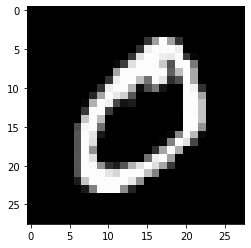

In [14]:
plt.imshow( X_train[1], cmap = "gray" )

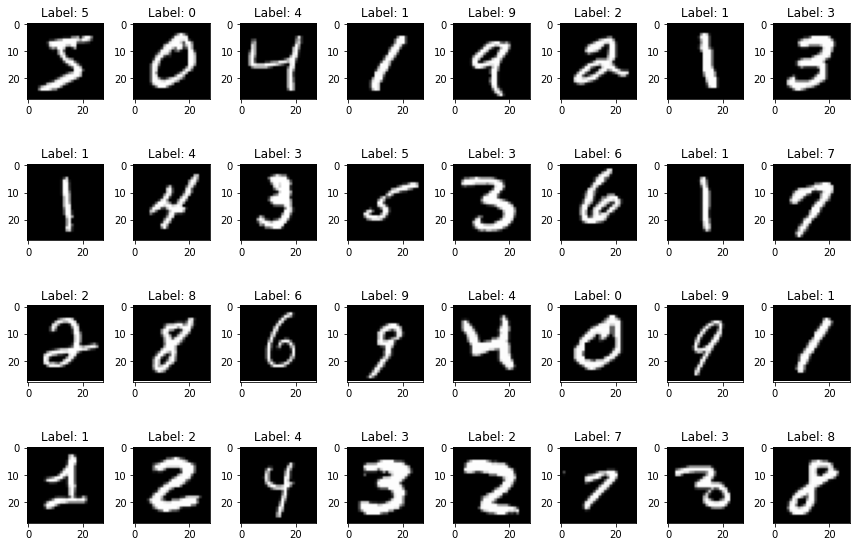

In [15]:
num_rows = 4
num_cols = 8
num = num_rows * num_cols

images = X_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots( num_rows, num_cols, figsize = ( 1.5 * num_cols, 2 * num_rows ) )
for i in range( num ):
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow( images[i], cmap='gray' )
    ax.set_title( "Label: {}".format( labels[i] ) )
plt.tight_layout( )
plt.show( )

In [16]:
# flattening my input variables from 3D matrices into 2D matrices.
X_train_flattened = X_train.reshape( len( X_train ), 28 * 28 )
X_test_flattened = X_test.reshape( len( X_test ), 28 * 28 )

X_train_flattened = X_train_flattened.astype( "float" )
X_test_flattened = X_test_flattened.astype( "float" )

In [17]:
# Normalizing the input within the range [0, 1]
X_train_flattened /= 255
X_test_flattened /= 255

In [19]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
model = tf.keras.Sequential( [
    tf.keras.layers.Dense( units = 256, input_shape = ( 784, ), activation = "relu",
                           kernel_regularizer = tf.keras.regularizers.L2( 0.01 ), name = "layer_1" ),
    tf.keras.layers.Dense( units = 128, activation = "relu",
                           kernel_regularizer = tf.keras.regularizers.L2( 0.01 ), name = "layer_2" ),
    tf.keras.layers.Dense( units = 64, activation = "relu", name = "layer_3" ),
    tf.keras.layers.Dense( units = 10, name = "output_layer" )
] )

In [32]:
model.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy( from_logits = True ),
               optimizer = "adam",
               metrics = ["accuracy"] )

In [33]:
model.summary( )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 256)               200960    
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 layer_3 (Dense)             (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit( X_train_flattened, y_train, batch_size = 64, epochs = 10 )

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2322 - accuracy: 0.9577
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2154 - accuracy: 0.9614
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2093 - accuracy: 0.9627
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2085 - accuracy: 0.9626
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2096 - accuracy: 0.9621
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2100 - accuracy: 0.9629
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2083 - accuracy: 0.9622
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2069 - accuracy: 0.9631
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2071 - accuracy: 0.9632
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2067 - accuracy: 0.9631

In [39]:
model.evaluate( X_test_flattened, y_test )

313/313 [==============================] - 1s 2ms/step - loss: 0.2164 - accuracy: 0.9611


[0.2163928747177124, 0.9610999822616577]

In [49]:
logits = model( X_test_flattened )
y_pred = tf.nn.softmax( logits )

In [51]:
y_pred[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.2677415e-06, 1.5403946e-05, 2.9930228e-03, 3.1182438e-04,
       1.1883919e-07, 1.2052269e-05, 6.2179630e-11, 9.9656701e-01,
       1.8804107e-05, 8.0549507e-05], dtype=float32)>

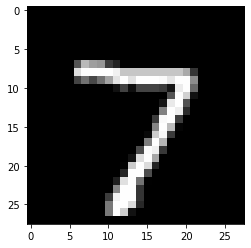

In [54]:
plt.imshow( X_test[0], cmap = "gray" )

In [53]:
y_test[0]

7

In [52]:
y_predictions = [np.argmax( i ) for i in y_pred]
y_predictions[0]

7

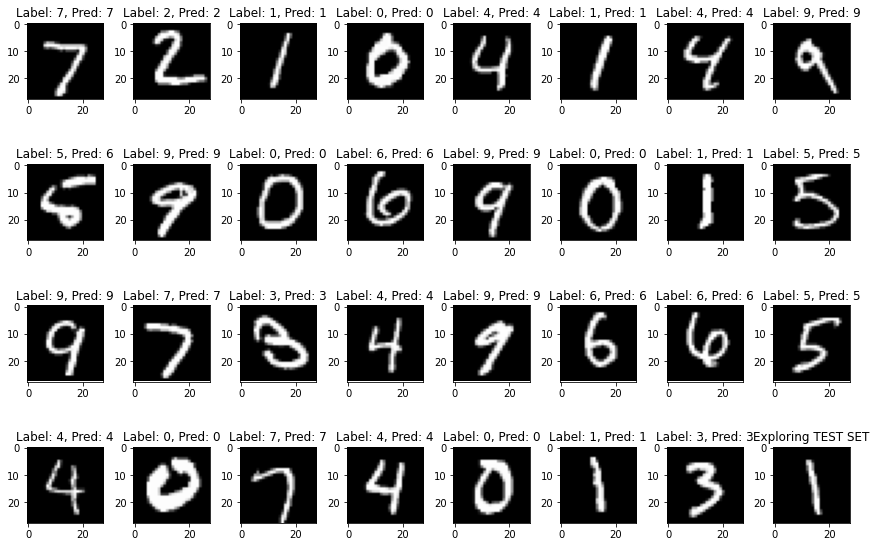

In [57]:
num_rows = 4
num_cols = 8
num = num_rows * num_cols

images = X_test[:num]
labels = y_test[:num]
predictions = y_predictions[:num]

# plot images
fig, axes = plt.subplots( num_rows, num_cols, figsize = ( 1.5 * num_cols, 2 * num_rows ) )
for i in range( num ):
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow( images[i], cmap='gray' )
    ax.set_title( "Label: {}, Pred: {}".format( labels[i], predictions[i] ) )
plt.tight_layout( )
plt.show( )

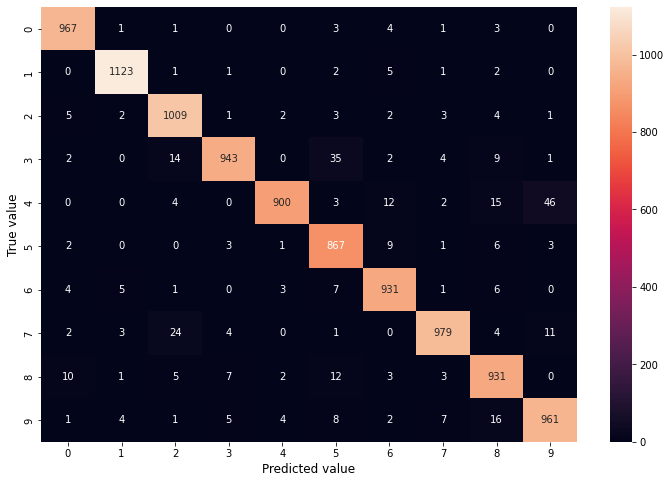

In [61]:
import seaborn as sns

cfm = tf.math.confusion_matrix( labels = y_test, predictions = y_predictions, num_classes = 10 )

plt.figure( figsize = ( 12, 8 ) )
sns.heatmap( cfm, annot = True, fmt = 'd' )
plt.xlabel( "Predicted value", fontsize = 12 )
plt.ylabel( "True value", fontsize = 12 )
plt.show( )

## Re-training the model with more neurons in layers without regularization

In [65]:
model = tf.keras.Sequential( [
    tf.keras.layers.Dense( units = 512, input_shape = ( 784, ), activation = "relu",
                           name = "layer_1" ),
    tf.keras.layers.Dense( units = 256, activation = "relu",
                           name = "layer_2" ),
    tf.keras.layers.Dense( units = 128, activation = "relu", name = "layer_3" ),
    tf.keras.layers.Dense( units = 10, name = "output_layer" )
] )

model.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy( from_logits = True ),
               optimizer = "adam",
               metrics = ["accuracy"] )

model.fit( X_train_flattened, y_train, batch_size = 64, epochs = 10 )

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2051 - accuracy: 0.9387
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0842 - accuracy: 0.9745
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0568 - accuracy: 0.9819
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0421 - accuracy: 0.9865
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0345 - accuracy: 0.9890
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0246 - accuracy: 0.9919
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0232 - accuracy: 0.9921
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0199 - accuracy: 0.9932
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0154 - accuracy: 0.9953

In [66]:
logits = model( X_test_flattened )
y_pred = tf.nn.softmax( logits )

y_predictions = [np.argmax( i ) for i in y_pred]

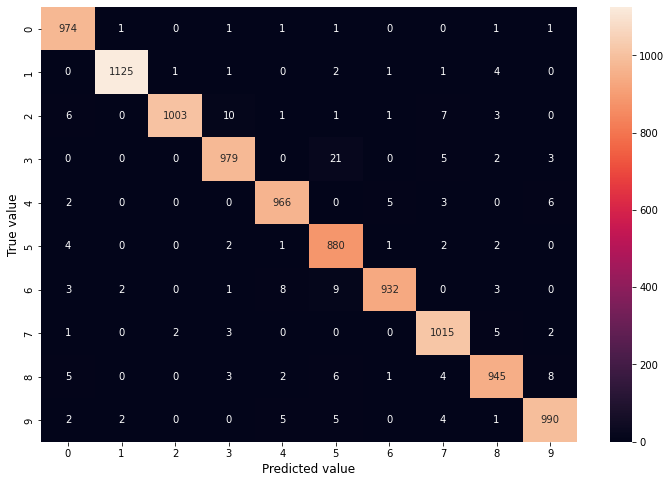

In [67]:
import seaborn as sns

cfm = tf.math.confusion_matrix( labels = y_test, predictions = y_predictions, num_classes = 10 )

plt.figure( figsize = ( 12, 8 ) )
sns.heatmap( cfm, annot = True, fmt = 'd' )
plt.xlabel( "Predicted value", fontsize = 12 )
plt.ylabel( "True value", fontsize = 12 )
plt.show( )

The new model is much better than the previous one, as shown in the above confusion matrix.

In [68]:
model.evaluate( X_test_flattened, y_test )

313/313 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.9809


[0.08966293185949326, 0.98089998960495]